# Temų modeliavimas

## Kintamieji

In [92]:
dataset = 'train.csv'
column_name = 'TITLE'
topics_amount = 6

## Pirminis teksto apdorojimas

In [93]:
import pandas as pd

df = pd.read_csv(dataset)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df = 0.85, stop_words = 'english')
dtm = tfidf.fit_transform(df[column_name])

## LDA

In [95]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components = topics_amount, random_state = 0)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=6, random_state=0)

In [96]:
topic_results = LDA.transform(dtm)
df['Topic'] = topic_results.argmax(axis = 1)
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Topic
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,2
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,2
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,5
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,5


## Vizualizacija

### WordCloud

In [97]:
LDA.components_

words_count_in_wordcloud = 10
    
topics = {}
for index, topic in enumerate(LDA.components_):    
    topics[index] = {}
    for i in topic.argsort()[-words_count_in_wordcloud:]:
        topics[index][tfidf.get_feature_names()[i]] = topic[i]

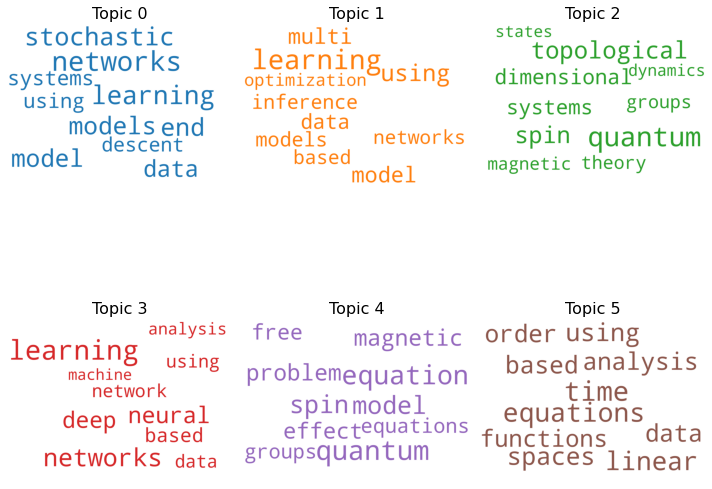

In [98]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


fig, axes = plt.subplots(2, int(topics_amount / 2), figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    cloud.generate_from_frequencies(topics[i], max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()